<a href="https://colab.research.google.com/github/JJJavier23/DeepLearning/blob/main/CS478_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

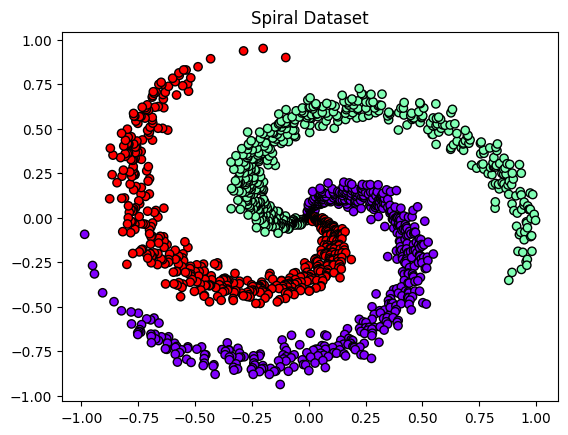

In [4]:
# Generate a spiral dataset
def generate_spiral_data(n_points, n_classes):
    X = []
    y = []
    for j in range(n_classes):
        ix = range(n_points * j, n_points * (j + 1))
        r = np.linspace(0.0, 1, n_points)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, n_points) + np.random.randn(n_points) * 0.2  # theta
        X.extend(np.c_[r * np.sin(t), r * np.cos(t)])
        y.extend([j] * n_points)
    return np.array(X), np.array(y)

# Generate data
n_points = 500  # Points per class
n_classes = 3   # Number of classes
X, y = generate_spiral_data(n_points, n_classes)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolor='k')
plt.title("Spiral Dataset")
plt.show()

1. Vanishing/Exploding Gradients:
Build a simple deep feedforward neural network with 5 hidden layers (each with 64 neurons) using sigmoid activation.
Train the model and observe its performance.
Analyze the impact of the vanishing gradient problem on training and test accuracy.


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3275 - loss: 1.1148 - val_accuracy: 0.3467 - val_loss: 1.0984
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3263 - loss: 1.1026 - val_accuracy: 0.2867 - val_loss: 1.0990
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3230 - loss: 1.0997 - val_accuracy: 0.3467 - val_loss: 1.0999
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3202 - loss: 1.1028 - val_accuracy: 0.3133 - val_loss: 1.0954
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3938 - loss: 1.0934 - val_accuracy: 0.4967 - val_loss: 1.0951
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3948 - loss: 1.0838 - val_accuracy: 0.5067 - val_loss: 1.0513
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4686 - loss: 1.0278 - val_accuracy: 0.5033 - val_loss: 0.9415
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5093 - loss: 0.9284 - val_accuracy: 0.556

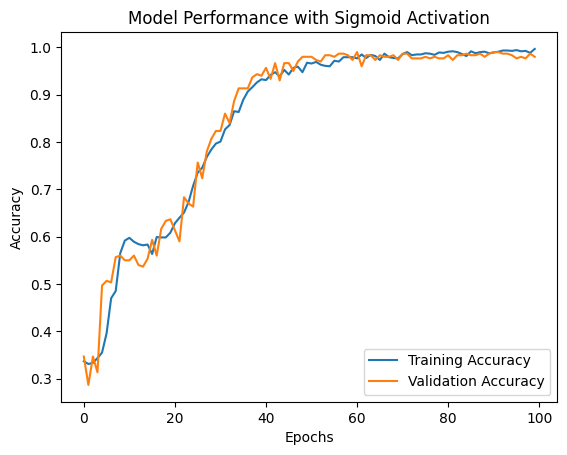

Train Accuracy: 0.9933, Test Accuracy: 0.9800


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Generate a spiral dataset
def generate_spiral_data(n_points, n_classes):
    X = []
    y = []
    for j in range(n_classes):
        ix = range(n_points * j, n_points * (j + 1))
        r = np.linspace(0.0, 1, n_points)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, n_points) + np.random.randn(n_points) * 0.2  # theta
        X.extend(np.c_[r * np.sin(t), r * np.cos(t)])
        y.extend([j] * n_points)
    return np.array(X), np.array(y)

# Generate data
n_points = 500  # Points per class
n_classes = 3   # Number of classes
X, y = generate_spiral_data(n_points, n_classes)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a deep neural network with sigmoid activation
model = keras.Sequential()
model.add(layers.Input(shape=(2,)))
for _ in range(5):
    model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(n_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Performance with Sigmoid Activation')
plt.legend()
plt.show()

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')


2. Improving Training:
Implement strategies to address the vanishing gradient problem and improve training:
Replace sigmoid with ReLU or other activation functions.
Add Batch Normalization to the network.
Incorporate Dropout to prevent overfitting.
Train and test the model after applying each strategy.
For each strategy, document the results and your observations about model performance

Sigmoid Activation (Vanishing Gradient) -> Train Accuracy: 0.8958, Test Accuracy: 0.8833


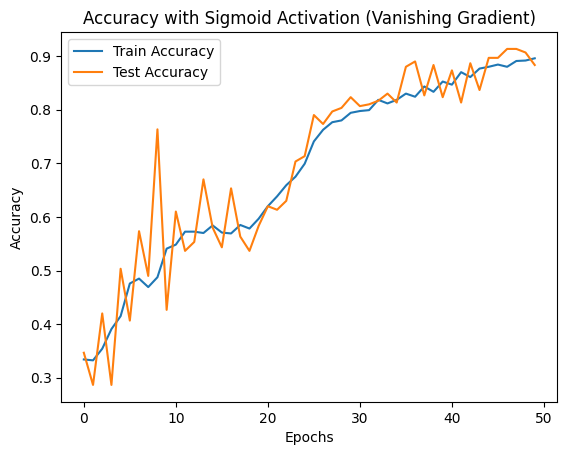

ReLU Activation -> Train Accuracy: 0.9933, Test Accuracy: 0.9833


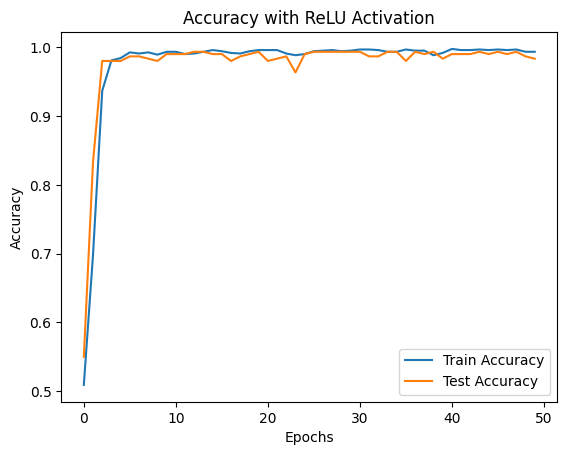

ReLU + Batch Normalization -> Train Accuracy: 0.9867, Test Accuracy: 0.9933


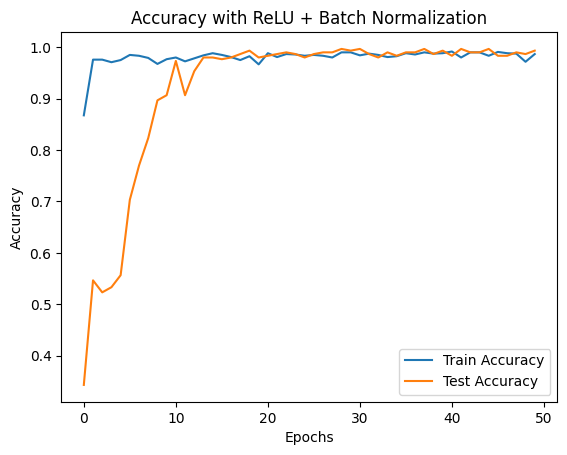

ReLU + BatchNorm + Dropout -> Train Accuracy: 0.8642, Test Accuracy: 0.9833


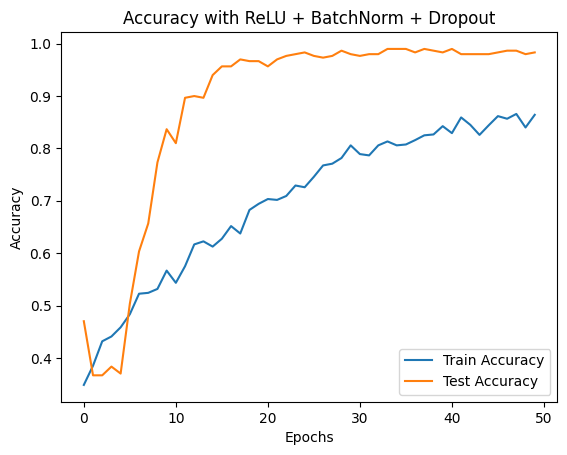

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Generate a spiral dataset
def generate_spiral_data(n_points, n_classes):
    X = []
    y = []
    for j in range(n_classes):
        ix = range(n_points * j, n_points * (j + 1))
        r = np.linspace(0.0, 1, n_points)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, n_points) + np.random.randn(n_points) * 0.2  # theta
        X.extend(np.c_[r * np.sin(t), r * np.cos(t)])
        y.extend([j] * n_points)
    return np.array(X), np.array(y)

# Generate data
n_points = 500  # Points per class
n_classes = 3   # Number of classes
X, y = generate_spiral_data(n_points, n_classes)

# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model with different strategies
def build_model(activation='sigmoid', batch_norm=False, dropout_rate=0.0):
    model = keras.Sequential()
    model.add(layers.Input(shape=(2,)))
    for _ in range(5):
        model.add(layers.Dense(64, activation=activation))
        if batch_norm:
            model.add(layers.BatchNormalization())
        if dropout_rate > 0.0:
            model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(n_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model
def train_and_evaluate_model(model, strategy_name):
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]
    print(f"{strategy_name} -> Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'Accuracy with {strategy_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Base model with Sigmoid activation
model = build_model(activation='sigmoid')
train_and_evaluate_model(model, 'Sigmoid Activation (Vanishing Gradient)')

#Different Strategies
# 1: ReLU Activation
model = build_model(activation='relu')
train_and_evaluate_model(model, 'ReLU Activation')

# 2: ReLU Activation with Batch Normalization
model = build_model(activation='relu', batch_norm=True)
train_and_evaluate_model(model, 'ReLU + Batch Normalization')

# 3: ReLU Activation with Batch Normalization and Dropout
model = build_model(activation='relu', batch_norm=True, dropout_rate=0.5)
train_and_evaluate_model(model, 'ReLU + BatchNorm + Dropout')
